# HR Database Design for Recuitment

**Table of Content**
- [1. **Loading Libraries and Functions**](#2.-Loading-Libraries-and-Functions): 
    - [1.1 Libraries](#Libraries): require updating `pandas` and `seaborn` to latest versions;
    - [1.2 List of all Functions](#List-of-All-Functions): include all the functions defined in this Notebook;

- [2. **Create Table and Data**](#1.-Add-Table-and-Data): run this for the first time. 
    - [2.1 Create table](#Create-Table)
    - [2.2 Insert-Record](#Insert-Record)

- [3. **RDB - Query Data and Transaction Support**](#3.-Query-Data)
    - [3.1 query candidate/current Employee of a specific Role](#query-candidate/current-Employee-of-a-specific-Role)
    - [3.2 register new candidates](#register-a-candidate:)
    - [3.3 remove a candidate from table](#remove-a-candidate-from-table)
    - [Application #1: Live Gender Pay Gap Reporting](#Application-#1:-Live-Gender-Pay-Gap-Reporting)
    - [Application #2: Live Staff Stress Level Alert](#Application-#2:-Live-Staff-Stress-Level-Alert)
    - [Application #3: Supply and Demand](#Application-#3:-Supply-and-Demand)
- [4. **NoRDB - Document Database**](#4.-NonRDB-element)
    - [Application #4: Select Employee](#Application-#4:-selecting-candidate)
    
- [5. **Backup SQL**](#5.-Backup-SQL)
    
For functions `get_data` to work, please load *list of all function* first.



ER diagram
![](ER.png)


## 1. Add Table and Data

#### Create Table

In [24]:
get_empl("artist")

,Employee_ID,Name,Turnover_Intention,Gender,Salary,Role_Name
12,20200013,Tamera Coleman,2,F,23000,Visualisation Artist
13,20200014,Glenn Atkinson,2,F,24000,Visualisation Artist
14,20200015,Olly Bryan,2,M,30000,Visualisation Artist
15,20200016,Harlen Richardson,2,F,50000,Visualisation Artist


In [ ]:
get_cand()

In [ ]:
import sqlite3
conn=sqlite3.connect("C:\\Users\\fl339\\OneDrive - University of Exeter\\Project\\HR Database\\RDBMS.db")
cur=conn.cursor()

In [ ]:
qry= '''
CREATE TABLE ROLES(
Role_ID INTEGER PRIMARY KEY,
Attrition INTEGER,
Role_Name TEXT(30)
);
CREATE TABLE PSYCHOMETRIC(
Applicant_ID INTEGER PRIMARY KEY REFERENCES CANDIDATES(Applicant_ID),
Openness INTEGER,
Neuroticism INTEGER,
Conscientiousness INTEGER,
Agreeableness INTEGER,
Extraversion INTEGER
);
CREATE TABLE NUMERICAL_RATIONING(
Applicant_ID INTEGER PRIMARY KEY REFERENCES CANDIDATES(Applicant_ID),
Score INTEGER
);
CREATE TABLE INTERVIEW(
Applicant_ID INTEGER PRIMARY KEY REFERENCES CANDIDATES(Applicant_ID),
Review TEXT(3000)
);
CREATE TABLE COMPOSITE TEST(
Applicant_ID INTEGER PRIMARY KEY REFERENCES CANDIDATES(Applicant_ID),
Recommend_Role TEXT(60)
);
'''
try:
    cur.executescript(qry)
    print('Table created successfully')
except:
    print('error in creating table')
    conn.rollback()

tables = tables_in_sqlite_db(conn)
print(tables)

In [ ]:
qry='''
CREATE TABLE EMPLOYEES (
Employee_ID INTEGER PRIMARY KEY,
Name TEXT(30),
Role INTEGER REFERENCES ROLES(Role_ID),
Turnover_Intention INTEGER,
Gender TEXT(1),
Salary INTEGER
);
'''
try:
    cur.executescript(qry)
    print("table added")
except sqlite3.Error as error:
    print("not added,",error)
    conn.rollback()
tables = tables_in_sqlite_db(conn)
print(tables)

In [ ]:
qry= '''
CREATE TABLE TESTS(
Role_ID INTEGER REFERENCES ROLES(Role_ID),
Test_Used TEXT(30)
);
'''
try:
    cur.execute(qry)
    print('Table created successfully')
except:
    print('error in creating table')
    conn.rollback()

tables = tables_in_sqlite_db(conn)
print(tables)

In [ ]:
qry='''
CREATE TABLE CANDIDATES(
Applicant_ID INTEGER PRIMARY KEY AUTOINCREMENT,
Name TEXT(30),
Role INTEGER REFERENCES ROLES(Role_ID),
Gender TEXT(1)
);
'''
try:
    cur.execute(qry)
    print('Table created successfully')
except sqlite3.Error as error:
    print('Notworking:(', error)
    conn.rollback()

In [ ]:
qry='''
CREATE TABLE COMPOSITE(
Applicant_ID INTEGER PRIMARY KEY,
Recommend_Role INTEGER REFERENCES ROLES(Role_ID)
);
'''
try:
    cur.execute(qry)
    print('Table created:)')
except sqlite3.Error as error:
    print('Notworking:(', error)
    conn.rollback()

In [ ]:
tables_in_sqlite_db(conn)

#### Insert Record

In [ ]:
# Employee Record
qry="INSERT INTO EMPLOYEES(Employee_ID, Name, Role, Turnover_Intention, Gender, Salary) values (?,?,?,?,?,?);"
emRecord = [(20200001,"Hector Richard",1,9,"M",23000),
            (20200002,"Deacon Coates",1,1,"M",24000),
            (20200003,"Jared Puckett",1,2,"M",30000),
            (20200004,"Judah Haworth",1,4,"F",50000),
            (20200005,"Dalton Herbert",2,6,"M",23000),
            (20200006,"Arslan Glover",2,2,"M",24000),
            (20200007,"Blake Alvarez",2,2,"M",30000),
            (20200008,"Esmay Dejesus",2,2,"F",50000),
            (20200009,"Donte Barnes",3,2,"M",23000),
            (20200010,"Akbar Hunter",3,2,"M",24000),
            (20200011,"Aahil Peters",3,7,"M",30000),
            (20200012,"Tamia Wall",3,2,"F",50000),
            (20200013,"Tamera Coleman",4,2,"F",23000),
            (20200014,"Glenn Atkinson",4,2,"F",24000),
            (20200015,"Olly Bryan",4,2,"M",30000),
            (20200016,"Harlen Richardson",4,2,"F",50000),
            (20200017,"Romeo Drake",5,5,"M",23000),
            (20200018,"Lavinia Howell",5,8,"F",24000),
            (20200019,"Star Michael",5,9,"F",30000),
            (20200020,"Lyla O'Connor",5,2,"F",50000)]
try:
    cur.executemany(qry, emRecord)
    conn.commit()
    print("Records is inserted successfully..committed")
except sqlite3.Error as error:
    print ('Error in insert operation..rollback', error)
    conn.rollback()

In [ ]:
# Candidate Record
qry="INSERT INTO CANDIDATES (Applicant_ID ,Name,Role,Gender) VALUES (?,?,?,?);"
apRecord=[(20210001, 'Nick Nilson', 1, 'M'),
          (20210002, 'Alessio Richards', 2, 'M'),
          (20210003, 'Connie Kennedy', 3, 'F'),
          (20210004, 'Gilbert Jaramillo', 4, 'M'),
          (20210005, 'Nojus Ford', 5, 'M'),
          (20210006, 'Melina Johnston', 4, 'F'),
          (20210007, 'Zacharia Duke', 0, 'F')]

try:
    cur.executemany(qry, apRecord)
    conn.commit()
    print("Record add successfully:)")
except sqlite3.Error as error:
    print ('Error in insert operation..rollback', error)
    conn.rollback()

In [ ]:
# Test
qry="INSERT INTO TESTS(Role_ID, Test_Used) VALUES (?,?)"
testrecord=[(1, 'Psychometric'),
            (1, 'Interview'),
            (3, 'Psychometric'),
            (3, 'Interview'),
            (3, 'Numerical Rationing'),
            (2, 'Numerical Rationing'),
            (2, 'Psychometric'),
            (2, 'Interview'),
            (4, 'Interview'),
            (5, 'Interview'),
            (0, 'Comprehensive Test')]

try:
    cur.executemany(qry, testrecord)
    conn.commit()
    print("Record added successfully:)")
except sqlite3.Error as error:
    print ('Error in insert operation..rollback', error)
    conn.rollback()

In [ ]:
# Role
qry="INSERT INTO ROLES(Role_ID, Attrition, Role_Name) VALUES (?,?,?)"
record =[(1, 0.1, 'Marketing'),
       (2, 0.3, 'Finance and Accounting'),
       (3, 0.2, 'Consultant Analysts'),
       (4, 0.1, 'Visualisation Artist'),
       (5, 0.5, 'Database Architect'),
       (0, 0.0, 'Unknown')]

try:
    cur.executemany(qry, record)
    conn.commit()
    print("Record added successfully:)")
except sqlite3.Error as error:
    print ('Error in insert operation..rollback', error)
    conn.rollback()


In [ ]:
get_data("TESTS")

In [ ]:
get_data("ROLES")

In [ ]:
qry="INSERT INTO PSYCHOMETRIC(Applicant_ID, Openness, Neuroticism, Conscientiousness, Agreeableness, Extraversion) VALUES (?,?,?,?,?,?)"
record = [(20210001,6,7, 1,  3, 5),
    (20210002, 10, 4,7,1,5),
       (20210003, 3, 0, 5, 2,7)]

try:
    cur.executemany(qry, record)
    conn.commit()
    print("Record added successfully:)")
except sqlite3.Error as error:
    print ('Error in insert operation..rollback', error)
    conn.rollback()

In [ ]:
get_data("PSYCHOMETRIC")

In [ ]:
qry="INSERT INTO NUMERICAL_RATIONING(Applicant_ID, Score) VALUES (?,?)"
record = [(20210002,       77),
       (20210003,       66)]

try:
    cur.executemany(qry, record)
    conn.commit()
    print("Record added successfully:)")
except sqlite3.Error as error:
    print ('Error in insert operation..rollback', error)
    conn.rollback()

In [ ]:
get_data("NUMERICAL_RATIONING")

In [ ]:
qry="INSERT INTO INTERVIEW(Applicant_ID, Review) VALUES (?,?)"
record = [(20210001,
        'Applies creative thinking to implement a vision for the company'),
       (20210002,
        'Continuously suggests new ideas in meetings and on projects'),
       (20210003,
        'Shows initiative with developing new ways of thinking to improve projects or company performance'),
       (20210004,
        'Effectively communicates with colleagues, supervisors, partners and customers'),
       (20210005,
        'Is a constructive communicator and is capable of discussing difficult issues effectively and to the point'),
       (20210006,
        'Admits mistakes and errors and informs others when unable to keep a commitment')
]

try:
    cur.executemany(qry, record)
    conn.commit()
    print("Record added successfully:)")
except sqlite3.Error as error:
    print ('Error in insert operation..rollback', error)
    conn.rollback()

In [ ]:
qry="INSERT INTO COMPOSITE(Applicant_ID, Recommend_Role) VALUES (?,?)"
record = [( 20210007, 5)
]

try:
    cur.executemany(qry, record)
    conn.commit()
    print("Record added successfully:)")
except sqlite3.Error as error:
    print ('Error in insert operation..rollback', error)
    conn.rollback()

In [ ]:
tables = tables_in_sqlite_db(conn)
print(tables)

## 2. Loading Libraries and Functions

Seaborn requires update everytime...

In [ ]:
pip install --upgrade pandas

In [ ]:
pip install seaborn --upgrade

#### Libraries

In [ ]:
import sqlite3
conn=sqlite3.connect("C:\\Users\\fl339\\OneDrive - University of Exeter\\Project\\HR Database\\RDBMS.db")
cur=conn.cursor()

In [ ]:
import pymongo
mongoclient = pymongo.MongoClient("mongodb://localhost:7000/")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.__version__
# Latest Version Should be 0.11.1

In [ ]:
pd.__version__
#lastest version is 1.2.4

#### List of All Functions

In [ ]:
# All Function Defined in This Work

# Function to Show Table
get_data = lambda tbname: pd.read_sql_query("SELECT * FROM " + tbname, conn)

# Delete Table Function
table_name = ""
def del_table(table_name):
    try:
        conn.execute('DROP TABLE IF EXISTS '+ table_name +";")
        print("table deleted")
    except sqlite3.Error as error:
        print("not working!", error)
    tables_in_sqlite_db(conn)
    print(tables)
    
# show all tables
def tables_in_sqlite_db(conn):
    cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [
        v[0] for v in cursor.fetchall()
        if v[0] != "sqlite_sequence"
    ]
    cursor.close()
    return tables
## remove space in strings
def remove(string):
    return string.replace(" ", "")

#Function to delete data
def del_candidate(inputNumber):
    qry='delete from CANDIDATES where Applicant_ID=?'
    try:
        cur.execute(qry, (inputNumber,))
        print ('Candidate deleted')
        conn.commit()
    except sqlite3.Error as error:
        print ('Error in deleting candidate', inputName)
        conn.rollback()
    return

# Employee Data
def get_empl(role = None):
    df0 = get_data("EMPLOYEES")
    roes1 = get_data('ROLES')
    if role == None:
        return df0.merge(right = roes1, how = "inner", left_on = 'Role', right_on = "Role_ID").drop(["Role", "Role_ID","Attrition"], axis = 1)
    else:
        df = df0.merge(right = roes1, how = "inner", left_on = 'Role', right_on = "Role_ID").drop(["Role", "Role_ID","Attrition"], axis = 1)
        return df[df["Role_Name"].str.contains(role.capitalize())]
    
# Candidate Data by role
def get_cand(role = None):
    df0 = get_data("CANDIDATES")
    roes1 = get_data('ROLES')
    if role == None:
        return df0.merge(right = roes1, how = "inner", left_on = 'Role', right_on = "Role_ID").drop(["Role", "Attrition"], axis = 1)
    else:
        df = df0.merge(right = roes1, how = "inner", left_on = 'Role', right_on = "Role_ID").drop(["Role", "Attrition"], axis = 1)
        pass # add function to qurey test data
        return df[df["Role_Name"].str.contains(role.capitalize())]
# *Capital Prove + Keyword Proof


#### for NonRDB 
# define function to retrive a candidate profile from JSON file
def cand_profile(keywords = None):
    if keywords is None:
        candy = mongoclient["HR_Database"]["CANDIDATES"].find()
        for i in candy:
            i = json.dumps(i, indent=2)
            print(i)
    elif type(keywords) == int:
        
        candy = mongoclient["HR_Database"]["CANDIDATES"].find({"_id": keywords})
        for i in candy:
            i = json.dumps(i, indent=2)
            print(i)
    else: 
        keywords = keywords.capitalize()
        candy = mongoclient["HR_Database"]["CANDIDATES"].find({"$or":[{"Name":{"$regex": keywords}}, {"Role_Name":{"$regex": keywords}}]} )
        for i in candy:
            i = json.dumps(i, indent=2)
            print(i)


    

In [ ]:
tables = tables_in_sqlite_db(conn)
print(tables)

Those employee data were redomly assigned. Despite in real life the female are victims of sex discrimination but in our case, this is reversed. 

Can easily see "Database Architect" and "Finance and Accounting" urgently require recuitment. 

## 3. Query Data

#### query candidate/current Employee of a specific Role

* Use `get_empl("keyword")` to look for employee of a certain role. No arguement returned return all employees. 
* Use `get_cand("keyword")` to look for candidates of a certain role. No arguement return all candidates. 

No need to imput full role names to acquire relevant data. Not distinguish capital letter.

In [ ]:
# Employee Data
def get_empl(role = None):
    df0 = get_data("EMPLOYEES")
    roes1 = get_data('ROLES')
    if role == None:
        return df0.merge(right = roes1, how = "inner", left_on = 'Role', right_on = "Role_ID").drop(["Role", "Role_ID","Attrition"], axis = 1)
    else:
        df = df0.merge(right = roes1, how = "inner", left_on = 'Role', right_on = "Role_ID").drop(["Role", "Role_ID","Attrition"], axis = 1)
        return df[df["Role_Name"].str.contains(role.capitalize())]
# Candidate Data by role
def get_cand(role = None):
    df0 = get_data("CANDIDATES")
    roes1 = get_data('ROLES')
    if role == None:
        return df0.merge(right = roes1, how = "inner", left_on = 'Role', right_on = "Role_ID").drop(["Role", "Attrition"], axis = 1)
    else:
        df = df0.merge(right = roes1, how = "inner", left_on = 'Role', right_on = "Role_ID").drop(["Role", "Attrition"], axis = 1)
        pass # add function to qurey test data
        return df[df["Role_Name"].str.contains(role.capitalize())]
### Capital Prove + Keyword Proof

In [ ]:
get_cand("market")

#### register a candidate:

Run following code to register an candidate into database. 

In [29]:
# define function to remove space
def remove(string):
    return string.replace(" ", "")

from threading import Timer
# set timer for input
timeout = 60
t = Timer(timeout, print, ['Sorry, times up'])
t.start()
prompt = "You have %d seconds to choose the correct answer...\n" % timeout
# insert into candidate table 
try:
    

    iNameF= input('Enter your frist name: ').capitalize()
    iNameL= input('Enter your last name: ').capitalize()
    iNameF = remove(iNameF)
    iNameL = remove(iNameL)

    iName = iNameF + " " + iNameL

    iRole=int(input("Role number for the role you are applying for: \n 1. Marketing \n 2. Finance and Accoungting \n 3. Consultant Analyst \n 4. Visualsiation Artist \n 5. Database Architect \n 0. Not Sure/Unknown \n"))

# candidate has three chance to enter a correct number or number will be assigned 0 
    i = 1 
    while (iRole > 6) or (iRole < 0): 
        if i < 3:
            print("Check role number again; A role number should be ranged from 0 to 5")
            iRole=int(input('Enter role number again: '))
            i = i + 1
        else: 
            iRole = 0
            break

    iGender = input('Enter your gender(M/F):').upper() #automatical to capital letter
    iGender = remove(iGender)

    print("entering...", iName ,iRole, iGender)
    

    qry = 'INSERT INTO CANDIDATES(Name, Role, Gender) VALUES(?,?,?)'
    try:
        cur.execute(qry, (iName, iRole, iGender))
        conn.commit()
        print("Record added successfully:)")
    except sqlite3.Error as error:
        print ('Error in insert operation..rollback', error)
        conn.rollback()
except: 
    print("interrupted, times out")
t.cancel()
pd.read_sql_query("SELECT * FROM CANDIDATES", conn)

Enter your frist name: frank
Enter your last name: liang 
Role number for the role you are applying for: 
 1. Marketing 
 2. Finance and Accoungting 
 3. Consultant Analyst 
 4. Visualsiation Artist 
 5. Database Architect 
 0. Not Sure/Unknown 
10
Check role number again; A role number should be ranged from 0 to 5
Enter role number again: 5
Enter your gender(M/F):m
entering... Frank Liang 5 M
Record added successfully:)


,Applicant_ID,Name,Role,Gender
0,20210001,Nick Nilson,1,M
1,20210002,Alessio Richards,2,M
2,20210003,Connie Kennedy,3,F
3,20210004,Gilbert Jaramillo,4,M
4,20210005,Nojus Ford,5,M
5,20210006,Melina Johnston,4,F
6,20210007,Zacharia Duke,0,F
7,20210017,Frank Liang,5,M
8,20210018,Frank Liang,5,M


#### remove a candidate from table
* Use function `del_candidate(applicant number)` to delete a candidate from CANDIDATES table (function defined). 

In [ ]:
#Function to remove a candidate from table
def del_candidate(inputNumber):
    qry='delete from CANDIDATES where Applicant_ID=?'
    try:
        cur.execute(qry, (inputNumber,))
        print ('Candidate deleted')
        conn.commit()
    except sqlite3.Error as error:
        print ('Error in deleting candidate', inputName)
        conn.rollback()
    return

# Function to Show Table
get_data = lambda tbname: pd.read_sql_query("SELECT * FROM " + tbname, conn)

In [ ]:
get_cand("artist")
del_candidate(20210016)

*note:
`get_data = lambda tbname: pd.read_sql_query("SELECT * FROM " + tbname, conn)` Equal to
```
def get_data(tbname):
    return pd.read_sql_query("SELECT * FROM " + tbname, conn)
```
if you put return afterwards it won't display anything. 

##### Application #1: Live Gender Pay Gap Reporting

Run following code to automatically generate gender pay gap reporting from `EMPLOYEES` table

In [25]:
df = pd.read_sql_query("SELECT * FROM EMPLOYEES", conn)
fltM = df["Gender"] == "M"
fltF = df["Gender"] == "F"
mq = df[fltM][["Salary"]].quantile([.25, 0.5, 0.75])
mq = mq.rename(columns = {"Salary":"Male Salary"})
fq = df[fltF][["Salary"]].quantile([.25, 0.5, 0.75])
fq = fq.rename(columns = {"Salary":"Female Salary"})
pd.concat([mq,fq],axis=1)

,Male Salary,Female Salary
0.25,23000.0,24000.0
0.50,24000.0,50000.0
0.75,30000.0,50000.0


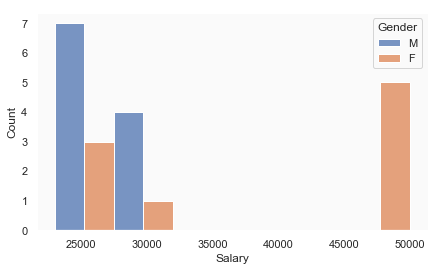

In [26]:
# a histogram of pay and gender
sns.set_style("dark",{"axes.facecolor": ".98"})
g = sns.histplot(data = df, x = "Salary", multiple = "dodge", hue = "Gender")

##### Application #2: Live Staff Stress Level Alert

Run following code to see which employee are most likey to burn-out. Based on Turnover_Intention ratings.

Text(0.5, 1.0, 'Which Roles are most Stressful?')

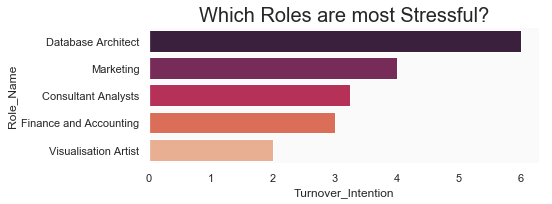

In [27]:
# fetch data
dfe = pd.read_sql_query("SELECT * FROM EMPLOYEES", conn)
dfc = pd.read_sql_query("SELECT * FROM CANDIDATES", conn)
role = pd.read_sql_query("SELECT * FROM ROLES", conn)
# transformation
rodc = role[role["Role_Name"]!= "Unknown"]["Role_Name"]
dfbo = dfe.groupby(["Role"])["Turnover_Intention"].mean()
bt = pd.concat([rodc,dfbo], axis = 1)
bt = bt.sort_values("Turnover_Intention", ascending=False)

sns.set(rc={'figure.figsize':(7, 2.5)})
sns.set_style("dark",{"axes.facecolor": ".98"})
ax = sns.barplot(data = bt, y = "Role_Name", x = "Turnover_Intention", 
                 orient = "h", palette = "rocket",
                )
ax.set_title(label = 'Which Roles are most Stressful?',fontsize=20)
#ax.set_yticklabels(tickLabels) ## alternatively

##### Application #3: Supply and Demand
See if a role has been filed

Text(0.5, 1.0, 'Which Role Urgently Requires Hiring?')

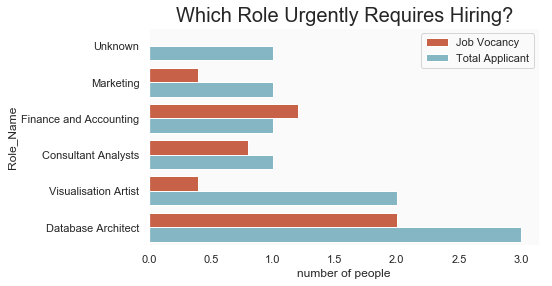

In [30]:
# fetch data
dfe = pd.read_sql_query("SELECT * FROM EMPLOYEES", conn)
dfc = pd.read_sql_query("SELECT * FROM CANDIDATES", conn)
# Transformation
candidate = dfc.groupby(["Role"])["Applicant_ID"].count()
employee = dfe.groupby(["Role"])["Employee_ID"].count()
HRdf = pd.concat([candidate,employee], axis = 1)
HRdf = pd.concat([HRdf, role], axis = 1)
HRdf = HRdf.rename(columns = {"Applicant_ID": "Total Applicant", "Employee_ID":"Total Employee"})
# a bit calculation
HRdf["Job Vocancy"] = HRdf["Total Employee"]*HRdf["Attrition"]
HRf = HRdf[["Total Applicant", "Job Vocancy", "Role_Name"]]

HR = HRf.melt(id_vars = ["Role_Name"], var_name = "type", value_name = "number of people")
# plot
sns.set(rc={'figure.figsize':(7, 4)})
sns.set_style("dark",{"axes.facecolor": ".98"})
col0 = sns.color_palette("icefire", 10)
col = [col0[8], col0[0]]
ax = sns.barplot(data = HR, y = "Role_Name", x = "number of people", hue = "type",
           hue_order = ["Job Vocancy", "Total Applicant"],
           orient = "h", 
           palette = col)
plt.legend(loc = "upper right")
ax.set_title(label = "Which Role Urgently Requires Hiring?", fontsize=20)

*what test should candidate take*

In [ ]:
get_cand()

# 4. NonRDB element

#### Create Document Database

In [31]:
dblist = mongoclient.list_database_names()
for x in dblist:
    print(x)

HR_Database
admin
config
local
myDB
test_database


In [32]:
# Create Table
db = mongoclient["HR_Database"]
col = db["CANDIDATES"]

# clear content first
mongoclient["HR_Database"]["CANDIDATES"].drop()

# transfer candidate to document database
dfj = get_cand() #.drop(["Role_ID"], axis = 1)

dfj = dfj.rename(columns = {"Applicant_ID":"_id"})
dfj.set_index("_id")
dfj = dfj.to_json(orient = "records")

import json

dfj = json.loads(dfj)
col.insert_many(dfj)

In [33]:
## Match and Insert Test Results 
# Psychometric Test
t_psy = get_data('PSYCHOMETRIC')
list = t_psy["Applicant_ID"]

for i in list: 
    js = t_psy[t_psy["Applicant_ID"] == i ].drop(["Applicant_ID"], axis = 1)
    js = json.loads(js.to_json(orient = "records")[1:-1])
    try : 
        fltr = { "_id": i }
        update = {"$set": { "Psychometric": js}}
        col.update_many(fltr, update)
        
    except: 
        print("Buhhhh")
        
# Numerical Rationing 
t_nmr = get_data('NUMERICAL_RATIONING')
list = t_nmr["Applicant_ID"]
for i in list: 
    js = t_nmr[t_nmr["Applicant_ID"] == i ].drop(["Applicant_ID"], axis = 1)
    js = json.loads(js.to_json(orient = "records")[1:-1])
    
    try : 
        fltr = { "_id": i }
        update = {"$set": { "Numerical Rationing Test": js}}
        col.update_many(fltr, update)
        
    except: 
        print("Buhhhh")

# Interview
t_int = get_data("INTERVIEW")
list = t_int["Applicant_ID"]

for i in list: 
    js = t_int[t_int["Applicant_ID"] == i ].drop(["Applicant_ID"], axis = 1)
    js = json.loads(js.to_json(orient = "records")[1:-1])
    
    try : 
        fltr = { "_id": i }
        update = {"$set": { "Interview": js}}
        col.update_many(fltr, update)
        
    except: 
        print("Buhhhh")

# Composite Test
t_cmp = get_data("COMPOSITE")
list = t_cmp["Applicant_ID"]
for i in list: 
    js = t_cmp[t_cmp["Applicant_ID"] == i ].drop(["Applicant_ID"], axis = 1)
    js = json.loads(js.to_json(orient = "records")[1:-1])
    
    try : 
        fltr = { "_id": i }
        update = {"$set": { "Composite Test": js}}
        col.update_many(fltr, update)
        
    except: 
        print("Buhhhh")

##### Application #4: selecting candidate


`cand_profile(keyword)` was defined to retrive a candidate's imformation from document database. as defined keywords accept both intger value and string. 

In [34]:
# define function to retrive a candidate profile from JSON file
def cand_profile(keywords = None):
    if keywords is None:
        candy = mongoclient["HR_Database"]["CANDIDATES"].find()
        for i in candy:
            i = json.dumps(i, indent=2)
            print(i)
    elif type(keywords) == int:
        
        candy = mongoclient["HR_Database"]["CANDIDATES"].find({"_id": keywords})
        for i in candy:
            i = json.dumps(i, indent=2)
            print(i)
    else: 
        keywords = keywords.capitalize()
        candy = mongoclient["HR_Database"]["CANDIDATES"].find({"$or":[{"Name":{"$regex": keywords}}, {"Role_Name":{"$regex": keywords}}]} )
        for i in candy:
            i = json.dumps(i, indent=2)
            print(i)


In [36]:
cand_profile(20210004)

{
  "_id": 20210004,
  "Name": "Gilbert Jaramillo",
  "Gender": "M",
  "Role_ID": 4,
  "Role_Name": "Visualisation Artist",
  "Interview": {
    "Review": "Effectively communicates with colleagues, supervisors, partners and customers"
  }
}


In [37]:
cand_profile()

{
  "_id": 20210001,
  "Name": "Nick Nilson",
  "Gender": "M",
  "Role_ID": 1,
  "Role_Name": "Marketing",
  "Psychometric": {
    "Openness": 6,
    "Neuroticism": 7,
    "Conscientiousness": 1,
    "Agreeableness": 3,
    "Extraversion": 5
  },
  "Interview": {
    "Review": "Applies creative thinking to implement a vision for the company"
  }
}
{
  "_id": 20210002,
  "Name": "Alessio Richards",
  "Gender": "M",
  "Role_ID": 2,
  "Role_Name": "Finance and Accounting",
  "Psychometric": {
    "Openness": 10,
    "Neuroticism": 4,
    "Conscientiousness": 7,
    "Agreeableness": 1,
    "Extraversion": 5
  },
  "Numerical Rationing Test": {
    "Score": 77
  },
  "Interview": {
    "Review": "Continuously suggests new ideas in meetings and on projects"
  }
}
{
  "_id": 20210003,
  "Name": "Connie Kennedy",
  "Gender": "F",
  "Role_ID": 3,
  "Role_Name": "Consultant Analysts",
  "Psychometric": {
    "Openness": 3,
    "Neuroticism": 0,
    "Conscientiousness": 5,
    "Agreeableness": 2,

In [38]:
cand_profile("database")

{
  "_id": 20210005,
  "Name": "Nojus Ford",
  "Gender": "M",
  "Role_ID": 5,
  "Role_Name": "Database Architect",
  "Interview": {
    "Review": "Is a constructive communicator and is capable of discussing difficult issues effectively and to the point"
  }
}
{
  "_id": 20210017,
  "Name": "Frank Liang",
  "Gender": "M",
  "Role_ID": 5,
  "Role_Name": "Database Architect"
}
{
  "_id": 20210018,
  "Name": "Frank Liang",
  "Gender": "M",
  "Role_ID": 5,
  "Role_Name": "Database Architect"
}


In [35]:
#what test should candidate take for each role? 
dft = get_data("TESTS")
for i in range(6):   
    js = dft[dft["Role_ID"] == i]["Test_Used"].to_json(orient = "records")[1:-1]
    
    print("If Role ID is",i,"please take",js, "test(s)")
    
    #myquery = { "Role_ID": i }
    #update = {"test"}

If Role ID is 0 please take "Comprehensive Test" test(s)
If Role ID is 1 please take "Psychometric","Interview" test(s)
If Role ID is 2 please take "Numerical Rationing","Psychometric","Interview" test(s)
If Role ID is 3 please take "Psychometric","Interview","Numerical Rationing" test(s)
If Role ID is 4 please take "Interview" test(s)
If Role ID is 5 please take "Interview" test(s)


## 5. Backup SQL

**backup**:

In [ ]:
conn=sqlite3.connect('C:\\Users\\fl339\\OneDrive - University of Exeter\\Project\\HR Database\\RDBMS.db')

file=open('HRdatabase_backup.sql','w')

for line in conn.iterdump():
        file.write('{}\n'.format(line))
        
file.close()

**restore**:

In [ ]:
connRestore=sqlite3.connect('C:\\Users\\fl339\\OneDrive - University of Exeter\\Project\\HR Database\\RDBMS.db')

file=open('BEMM459_backup.sql','r')
qry=file.read()
file.close()

curRestore=connRestore.cursor()
curRestore.executescript(qry)

# call function (defined earlier) and pass connection object 
tables = tables_in_sqlite_db(connRestore)

#print tables in the newly restored database
print(tables)

connRestore.close()